In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from multiprocessing import Pool, cpu_count
from concurrent.futures import ThreadPoolExecutor, as_completed
import asyncio
import io
import aiofiles
import nest_asyncio
from typing import List


nest_asyncio.apply()

In [17]:
path1 = "data/orthophotos/nw/dop10rgbi_32_462_5766_1_nw_2022.jp2"
path2 = "data/orthophotos/nw/dop10rgbi_32_462_5767_1_nw_2022.jp2"


In [18]:
image1 = Image.open(path1).convert("RGB")
image_array_1 = np.array(image1)
# image2 = Image.open(path2).convert("RGB")
# image_array_2 = np.array(image2)

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(10000, 10000, 3)


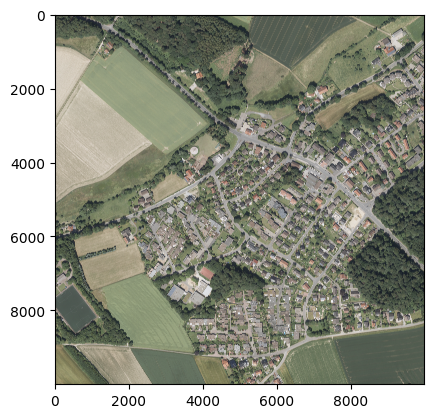

In [20]:
print(image_array_1.shape)
plt.imshow(image_array_1)

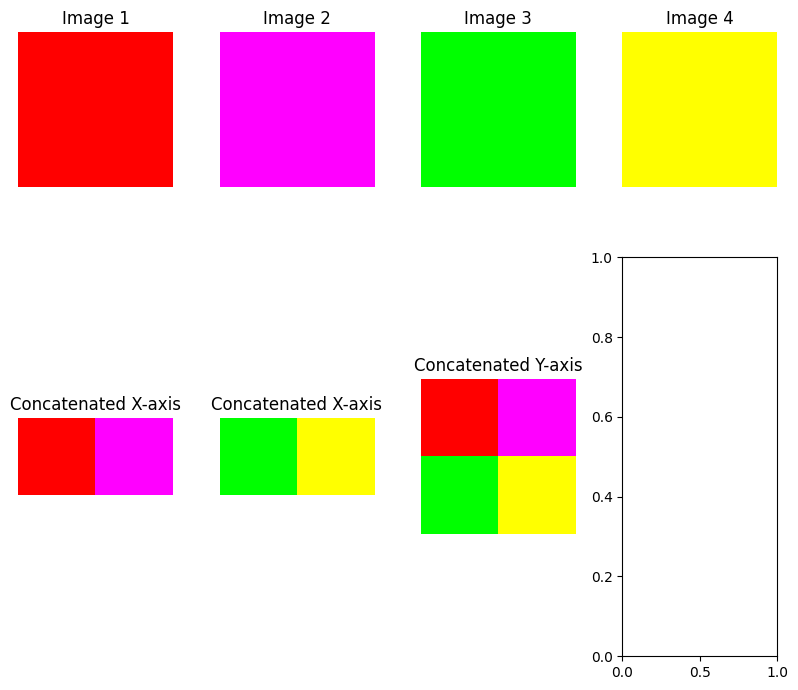

In [16]:
red = [255, 0, 0]
green = [0, 255, 0]
blue = [0, 0, 255]
cyan = [0, 255, 255]
magenta = [255, 0, 255]
yellow = [255, 255, 0]
black = [0, 0, 0]
white = [255, 255, 255]

# Create the 2x2 image array for the first image
image1 = np.array([
    [red, red],
    [red, red]
])

image2 = np.array([
    [magenta, magenta],
    [magenta, magenta]
])

image3 = np.array([
    [green, green],
    [green, green]
])

image4 = np.array([
    [yellow, yellow],
    [yellow, yellow]
])

# Concatenate the images along the x-axis (horizontal)
concatenated_1 = np.concatenate((image1, image2), axis=1)

# Concatenate the images along the y-axis (vertical)
concatenated_2 = np.concatenate((image3, image4), axis=1)

concat_all = np.concatenate((concatenated_1, concatenated_2), axis=0)

# Plot the images
fig, axs = plt.subplots(2, 4, figsize=(8, 8))

# Plot the original images
axs[0, 0].imshow(image1.astype(np.uint8))
axs[0, 0].set_title("Image 1")
axs[0, 0].axis('off')

axs[0, 1].imshow(image2.astype(np.uint8))
axs[0, 1].set_title("Image 2")
axs[0, 1].axis('off')

axs[0, 2].imshow(image3.astype(np.uint8))
axs[0, 2].set_title("Image 3")
axs[0, 2].axis('off')

axs[0, 3].imshow(image4.astype(np.uint8))
axs[0, 3].set_title("Image 4")
axs[0, 3].axis('off')

# Plot the concatenated images
axs[1, 0].imshow(concatenated_1.astype(np.uint8))
axs[1, 0].set_title("Concatenated X-axis")
axs[1, 0].axis('off')

axs[1, 1].imshow(concatenated_2.astype(np.uint8))
axs[1, 1].set_title("Concatenated X-axis")
axs[1, 1].axis('off')

axs[1, 2].imshow(concat_all.astype(np.uint8))
axs[1, 2].set_title("Concatenated Y-axis")
axs[1, 2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()


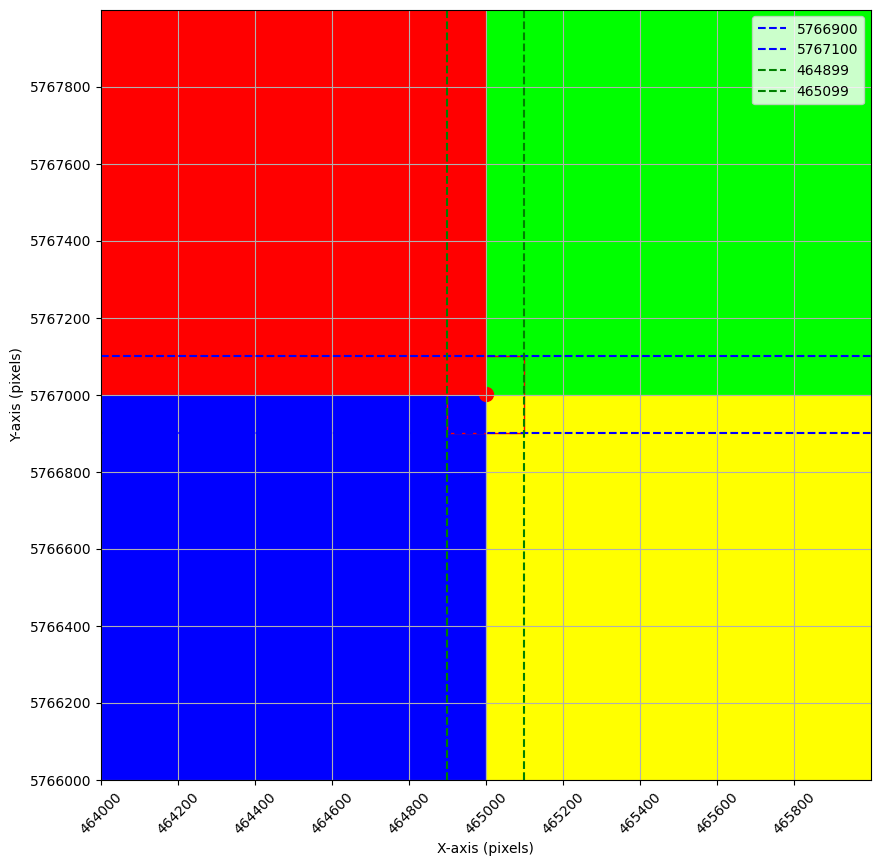

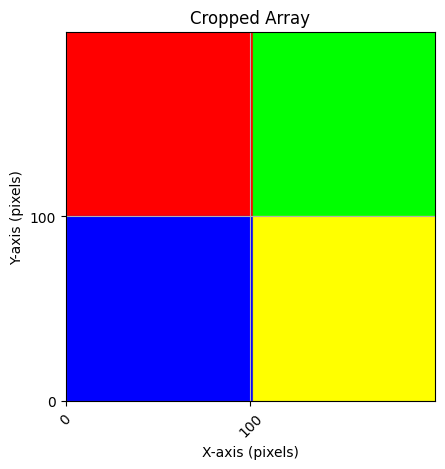

(200, 200, 3)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate a placeholder 2000x2000 array with four different colored tiles
array = np.zeros((2000, 2000, 3))

# Define colors for the four quadrants
color1 = [1, 0, 0]  # Red
color2 = [0, 1, 0]  # Green
color3 = [0, 0, 1]  # Blue
color4 = [1, 1, 0]  # Yellow

# Fill the quadrants
array[0:1000, 0:1000] = color1
array[0:1000, 1000:2000] = color2
array[1000:2000, 0:1000] = color3
array[1000:2000, 1000:2000] = color4

# Define the coordinates for the entire map and the cropped area
x_min_map = 464000
x_max_map = 465999
y_min_map = 5766000
y_max_map = 5767999

x_min_crop = 464899
x_max_crop = 465098
y_min_crop = 5766900
y_max_crop = 5767099

# Calculate the indices for cropping
x_start_index = x_min_crop - x_min_map
x_end_index = x_max_crop - x_min_map + 1  # Adjust to include 200 pixels
y_start_index = y_min_crop - y_min_map
y_end_index = y_max_crop - y_min_map + 1  # Adjust to include 200 pixels

# Coordinates for the red point
x = 464999
y = 5767000

# Crop the sub-region from the array
cropped_array = array[y_start_index:y_end_index, x_start_index:x_end_index]

# Plotting the original image with the marked rectangle
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(array, extent=[0, 2000, 0, 2000])

# Marking the specific axis values
ax.axhline(y=2000 * (5766900 - y_min_map) / (y_max_map - y_min_map), color='blue', linestyle='--', label='5766900')
ax.axhline(y=2000 * (5767100 - y_min_map) / (y_max_map - y_min_map), color='blue', linestyle='--', label='5767100')
ax.axvline(x=2000 * (464899 - x_min_map) / (x_max_map - x_min_map), color='green', linestyle='--', label='464899')
ax.axvline(x=2000 * (465099 - x_min_map) / (x_max_map - x_min_map), color='green', linestyle='--', label='465099')

# Drawing a red point
ax.scatter(2000 * (x - x_min_map) / (x_max_map - x_min_map), 
           2000 * (y - y_min_map) / (y_max_map - y_min_map), 
           color='red', s=100)

# Drawing a red rectangle
rect = patches.Rectangle(
    (2000 * (x_min_crop - x_min_map) / (x_max_map - x_min_map), 2000 * (y_min_crop - y_min_map) / (y_max_map - y_min_map)),
    2000 * (x_max_crop - x_min_crop) / (x_max_map - x_min_map),
    2000 * (y_max_crop - y_min_crop) / (y_max_map - y_min_map),
    linewidth=1,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)

# Adding labels and legend
ax.set_xlabel('X-axis (pixels)')
ax.set_ylabel('Y-axis (pixels)')
ax.legend()

# Set grid with a raster of 100 pixels and label every 200 pixels
ax.set_xticks(np.arange(0, 2000, 200))
ax.set_xticklabels(np.arange(x_min_map, x_max_map, 200), rotation=45)
ax.set_yticks(np.arange(0, 2000, 200))
ax.set_yticklabels(np.arange(y_min_map, y_max_map, 200))
ax.grid(True)


# Display the plot with the rectangle
plt.show()

# Plotting the cropped array with corrected extents
fig, ax = plt.subplots()
ax.imshow(cropped_array, extent=[0, 200, 0, 200])
plt.title("Cropped Array")
plt.xlabel('X-axis (pixels)')
plt.ylabel('Y-axis (pixels)')
ax.set_xticks(np.arange(0, 200, 100))
ax.set_xticklabels(np.arange(0, 200, 100), rotation=45)
ax.set_yticks(np.arange(0, 200, 100))
ax.set_yticklabels(np.arange(0, 200, 100))
ax.grid(True, which='both')
plt.show()

# Return the shape of the cropped array to verify dimensions
cropped_array.shape


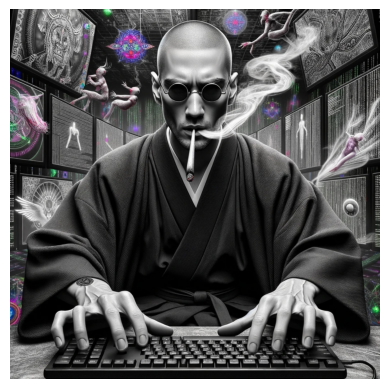

In [71]:
dalle_img = Image.open("data/smokin.png")
dalle_img = dalle_img.convert("RGB")
plt.imshow(dalle_img)
plt.axis("off")
plt.show()

In [2]:
def get_long(file_path: str) -> int:
    """Returns the starting point of longitude of an image"""
    longitude = int(file_path.split('_')[2]) * 1000
    return longitude

def get_lat(file_path: str) -> int:
    """Returns the starting point of latitude of an image"""
    latitude = int(file_path.split('_')[3]) * 1000
    return latitude

In [3]:
def stitch_imgs(files: List) -> np.array:
    pass

In [4]:
long = 464000
lat = 5767999

radius = 100

In [5]:
# def get_files(lat: int, long: int, radius: int = 100, data_dir: str = "data/orthophotos/nw/") -> list[str]:
    # return all necessary filenames for the requested range

data_dir = "data/orthophotos/nw"
file_names = sorted(os.listdir(data_dir))


file_longs = [get_long(file_path=file_name) for file_name in file_names]
file_lats = [get_lat(file_path=file_name) for file_name in file_names]

file_min_long, file_max_long = min(file_longs), max(file_longs) + 999
file_min_lat, file_max_lat = min(file_lats), max(file_lats) + 999

assert file_min_long <= long <= file_max_long, f"Longitude value should be between {file_min_long} and {file_max_long}. Actual value: {long}"
assert file_min_lat <= lat <= file_max_lat, f"Latitude value should be between {file_min_lat} and {file_max_lat}. Actual value: {lat}"

long_range_min, long_range_max = long - radius, long + radius
lat_range_min, lat_range_max = lat - radius, lat + radius

# get all files for the longitudinal range
long_files = [file for file in file_names if (str(int(long_range_min/1000)) in file or str(int(long_range_max / 1000)) in file)]
# from those get all the files for the latitudinal range
target_files = [file for file in long_files if (str(int(lat_range_min/1000)) in file or str(int(lat_range_max / 1000)) in file)]
target_files = [f"{data_dir}/{file}" for file in target_files]
# now these files would need to be stitched together:
if len(target_files) == 1:
    _map = target_files[0]
elif len(target_files) > 1:

    _map = stitch_imgs(target_files)

# TODO: crop the map to only show the point and radius

# TODO: resize to 256x256



In [ ]:
    # img_2 = np.array(Image.open(files_paths[1]).convert("RGB"))
    # img = np.concatenate(img_1, img_2, axis=axis)

In [6]:
target_files
        

['data/orthophotos/nw/dop10rgbi_32_463_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_463_5768_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5768_1_nw_2022.jp2']

In [21]:
# actually, load all the images at once first. 
# they take a while to load but they fit well into memory

def load_img(files_path: str) -> np.array:
    img = np.array(Image.open(files_path).convert("RGB"))
    return img

def load_imgs(files_paths: list[str]) -> list[np.array]:
    n_processes = cpu_count() - 1
    with Pool(processes=n_processes) as pool:
        image_arrays =  pool.map(load_img, files_paths)
    return image_arrays



In [30]:
def thread_loader(file_paths: list[str]) -> list[np.ndarray]:
    n_workers = os.cpu_count()
    images = []
    with ThreadPoolExecutor(max_workers=n_workers) as executor:
        futures = {executor.submit(load_img, path): path for path in file_paths}
        for future in as_completed(futures):
            img = future.result()
            images.append(img)
    return images

In [29]:
# yes = load_imgs(target_files)
yes = thread_loader(target_files)

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [31]:
yes = thread_loader(target_files)

In [32]:
# this runs faster than threadpool lol
yes = []
for file in target_files:
    img = load_img(file)
    yes.append(img)

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [9]:
async def a_load_img(file_path: str) -> np.ndarray:
    try:
        async with aiofiles.open(file_path, 'rb') as f:
            data = await f.read()
        img = Image.open(io.BytesIO(data))
        return np.array(img.convert("RGB"))
    except Exception as e:
        print(f"Error loading image from {file_path}: {e}")
        return np.array([])


async def async_loader(file_paths: List[str]) -> List[np.ndarray]:
    # n_workers = os.cpu_count()
    # loop = asyncio.get_running_loop()
    # with ThreadPoolExecutor(max_workers=n_workers) as exec:
    #     tasks = [
    #         loop.run_in_executor(exec, asyncio.ensure_future, file_path) for file_path in file_paths
    #     ]
    #     return await asyncio.gather(*tasks)
    tasks = [a_load_img(file_path) for file_path in file_paths]
    return await asyncio.gather(*tasks)

def run_async_loader(file_paths: List[str]) -> List[np.ndarray]:
    if asyncio.get_event_loop().is_running():
        return asyncio.get_event_loop().run_until_complete(async_loader(file_paths))
    else:
        return asyncio.run(async_loader(file_paths))

In [10]:
a_images = run_async_loader(target_files)

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [49]:
a_images

[<Task pending name='Task-3' coro=<a_load_img() running at /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/ipykernel_50558/2215514220.py:1>>,
 <Task pending name='Task-4' coro=<a_load_img() running at /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/ipykernel_50558/2215514220.py:1>>,
 <Task pending name='Task-5' coro=<a_load_img() running at /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/ipykernel_50558/2215514220.py:1>>,
 <Task pending name='Task-6' coro=<a_load_img() running at /var/folders/y3/vr_wt4191fg1wxp297qjknbc0000gp/T/ipykernel_50558/2215514220.py:1>>]

In [ ]:
# combine the images latitudewise
# how do we know which way to stitch them together ? -> the filename

# filenames come in descending order starting from longitude

map_list = []
while len(target_files) > 1:
    if get_long(target_files[0]) == get_long(target_files[1]):
        # load and stitch the images along the x-axis
        comb_image = load_imgs([target_files[0], target_files[1]], axis=1)
        map_list.append(comb_image)
    else:
        # load and stitch the images along the y-axis
        comb_image = load_imgs([target_files[0], target_files[1]], axis=0)
        map_list.append(comb_image)
    # delete the images we already processed
    [target_files.pop(ind) for ind in [0,1]]
    

['dop10rgbi_32_463_5767_1_nw_2022.jp2', 'dop10rgbi_32_464_5767_1_nw_2022.jp2']

In [14]:
target_files

['dop10rgbi_32_463_5768_1_nw_2022.jp2', 'dop10rgbi_32_464_5768_1_nw_2022.jp2']

In [12]:
del target_files[0]
del target_files[1]

TypeError: 'list' object cannot be interpreted as an integer

In [109]:
target_files

['dop10rgbi_32_463_5767_1_nw_2022.jp2',
 'dop10rgbi_32_463_5768_1_nw_2022.jp2',
 'dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'dop10rgbi_32_464_5768_1_nw_2022.jp2']

In [ ]:
# def stitch_images(files):
files = target_files
img_arrays = 

In [2]:
file1 = "data/orthophotos/nw/dop10rgbi_32_463_5767_1_nw_2022.jp2"

In [5]:
image_1 = Image.open(file1)
image_1 = image_1.convert("RGB")

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


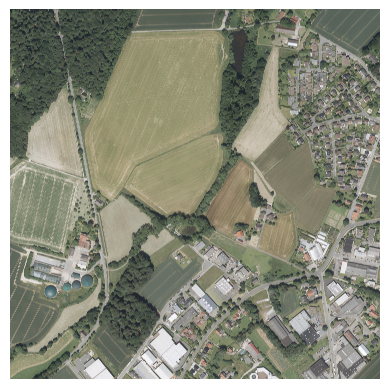

In [7]:
plt.imshow(image_1)
plt.axis("off")
plt.show()

In [99]:
int(lat_range_min / 1000)

464

In [100]:
int(lat_range_max / 1000)

464

In [ ]:
# every pixel corresponds to one square meter



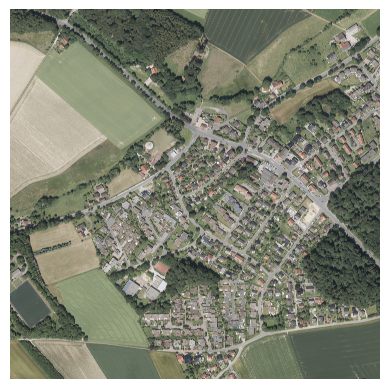

In [5]:
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

In [ ]:
'dop10rgbi_32_462_5766_1_nw_2022.jp2', 'dop10rgbi_32_462_5767_1_nw_2022.jp2',

In [ ]:
# between those images, we can define the point 462999, 5766999.

In [126]:
def extract_lat_lon(filename):
    parts = filename.split('_')
    lat = int(parts[2]) * 1000
    lon = int(parts[3]) * 1000
    return lat, lon

def check_files_needed(lat, lon, radius):
    # Calculate the latitude and longitude ranges
    lat_range_min = lat - radius
    lat_range_max = lat + radius
    lon_range_min = lon - radius
    lon_range_max = lon + radius
    
    # Perform integer division by 1000 to determine the file segments
    min_lat_index = int(lat_range_min / 1000)
    max_lat_index = int(lat_range_max / 1000)
    min_lon_index = int(lon_range_min / 1000)
    max_lon_index = int(lon_range_max / 1000)
    
    # Calculate the number of segments covered
    lat_segments_covered = max_lat_index - min_lat_index + 1
    lon_segments_covered = max_lon_index - min_lon_index + 1
    
    return lat_segments_covered, lon_segments_covered

# List of filenames
filenames = [
    'dop10rgbi_32_462_5766_1_nw_2022.jp2', 'dop10rgbi_32_462_5767_1_nw_2022.jp2',
    'dop10rgbi_32_462_5768_1_nw_2022.jp2', 'dop10rgbi_32_462_5769_1_nw_2022.jp2',
    'dop10rgbi_32_462_5770_1_nw_2022.jp2', 'dop10rgbi_32_462_5771_1_nw_2022.jp2',
    'dop10rgbi_32_462_5772_1_nw_2022.jp2', 'dop10rgbi_32_462_5773_1_nw_2022.jp2',
    'dop10rgbi_32_463_5766_1_nw_2022.jp2', 'dop10rgbi_32_463_5767_1_nw_2022.jp2',
    'dop10rgbi_32_463_5768_1_nw_2022.jp2', 'dop10rgbi_32_463_5769_1_nw_2022.jp2',
    'dop10rgbi_32_463_5770_1_nw_2022.jp2', 'dop10rgbi_32_463_5771_1_nw_2022.jp2',
    'dop10rgbi_32_463_5772_1_nw_2022.jp2', 'dop10rgbi_32_463_5773_1_nw_2022.jp2',
    'dop10rgbi_32_464_5766_1_nw_2022.jp2', 'dop10rgbi_32_464_5767_1_nw_2022.jp2',
    'dop10rgbi_32_464_5768_1_nw_2022.jp2', 'dop10rgbi_32_464_5769_1_nw_2022.jp2',
    'dop10rgbi_32_464_5770_1_nw_2022.jp2', 'dop10rgbi_32_464_5771_1_nw_2022.jp2',
    'dop10rgbi_32_464_5772_1_nw_2022.jp2', 'dop10rgbi_32_464_5773_1_nw_2022.jp2',
    'dop10rgbi_32_465_5766_1_nw_2022.jp2', 'dop10rgbi_32_465_5767_1_nw_2022.jp2',
    'dop10rgbi_32_465_5768_1_nw_2022.jp2', 'dop10rgbi_32_465_5769_1_nw_2022.jp2',
    'dop10rgbi_32_465_5770_1_nw_2022.jp2', 'dop10rgbi_32_465_5771_1_nw_2022.jp2',
    'dop10rgbi_32_465_5772_1_nw_2022.jp2', 'dop10rgbi_32_465_5773_1_nw_2022.jp2',
    'dop10rgbi_32_466_5766_1_nw_2022.jp2', 'dop10rgbi_32_466_5767_1_nw_2022.jp2',
    'dop10rgbi_32_466_5768_1_nw_2022.jp2', 'dop10rgbi_32_466_5769_1_nw_2022.jp2',
    'dop10rgbi_32_466_5770_1_nw_2022.jp2', 'dop10rgbi_32_466_5771_1_nw_2022.jp2',
    'dop10rgbi_32_466_5772_1_nw_2022.jp2', 'dop10rgbi_32_466_5773_1_nw_2022.jp2',
    'dop10rgbi_32_467_5766_1_nw_2022.jp2', 'dop10rgbi_32_467_5767_1_nw_2022.jp2',
    'dop10rgbi_32_467_5768_1_nw_2022.jp2', 'dop10rgbi_32_467_5769_1_nw_2022.jp2',
    'dop10rgbi_32_467_5770_1_nw_2022.jp2', 'dop10rgbi_32_467_5771_1_nw_2022.jp2',
    'dop10rgbi_32_467_5772_1_nw_2022.jp2', 'dop10rgbi_32_467_5773_1_nw_2022.jp2',
    'dop10rgbi_32_468_5766_1_nw_2022.jp2', 'dop10rgbi_32_468_5767_1_nw_2022.jp2',
    'dop10rgbi_32_468_5768_1_nw_2022.jp2', 'dop10rgbi_32_468_5769_1_nw_2022.jp2',
    'dop10rgbi_32_468_5770_1_nw_2022.jp2', 'dop10rgbi_32_468_5771_1_nw_2022.jp2',
    'dop10rgbi_32_468_5772_1_nw_2022.jp2', 'dop10rgbi_32_468_5773_1_nw_2022.jp2',
    'dop10rgbi_32_469_5766_1_nw_2022.jp2', 'dop10rgbi_32_469_5767_1_nw_2022.jp2',
    'dop10rgbi_32_469_5768_1_nw_2022.jp2', 'dop10rgbi_32_469_5769_1_nw_2022.jp2',
    'dop10rgbi_32_469_5770_1_nw_2022.jp2', 'dop10rgbi_32_469_5771_1_nw_2022.jp2',
    'dop10rgbi_32_469_5772_1_nw_2022.jp2', 'dop10rgbi_32_469_5773_1_nw_2022.jp2'
]

# Radius in meters
radius = 100

# Check for coordinates that require more than two images
for filename in filenames:
    lat, lon = extract_lat_lon(filename)
    lat_segments_covered, lon_segments_covered = check_files_needed(lat, lon, radius)
    if lat_segments_covered > 2 or lon_segments_covered > 2:
        print(f"Coordinates ({lat}, {lon}) require more than two images.")
